# Students Adaptability Level in Online Education
Effectiveness of online education


## Dataset

**Introducción**

Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of Students’ Adaptability Level Prediction in Online Education using Machine Learning Approaches


**Fuente**

the original research paper. Students' Adaptability Level Prediction in Online Education using Machine Learning Approaches or DOI: 10.1109/ICCCNT51525.2021.9579741

https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

**Inspiration**

Provides an idea about the effectiveness of online education 




**Variables**

The target feature is:
Adaptivity level

The feature sets are:
Gender |
Age|
Education Level|
Institution Type|
IT Student|
Location in Town|
Load-shedding|
Financial Condition|
Internet Type|
Network Type|
Class Duration|
Self LMS|
Device|



## Imports

In [49]:
import pandas as pd
import numpy as np



##  Preparing data for exploration

Opening dataset students_adaptability_level_online_education.csv



In [50]:
data_raw = pd.read_csv('students_adaptability_level_online_education.csv')
data_raw.shape

(1205, 14)

Data exploratory

In [51]:
data_raw.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')


Rename columns

In [52]:
data_raw.rename(columns={"Gender":"gender","Age":"age","Education Level":"education_level",
"Institution Type":"institution_type","IT Student":"IT_student","Location":"location",
"Load-shedding":"electricity_supply","Financial Condition":"financial_condition",
"Internet Type":"internet_type","Network Type":"network_type","Class Duration":"class_duration",
"Self Lms":"learning_system","Device":"device","Adaptivity Level":"adaptivity_level",
} ,inplace=True)

In [53]:
data_raw.head(3)

,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate


In [54]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               1205 non-null   object
 1   age                  1205 non-null   object
 2   education_level      1205 non-null   object
 3   institution_type     1205 non-null   object
 4   IT_student           1205 non-null   object
 5   location             1205 non-null   object
 6   electricity_supply   1205 non-null   object
 7   financial_condition  1205 non-null   object
 8   internet_type        1205 non-null   object
 9   network_type         1205 non-null   object
 10  class_duration       1205 non-null   object
 11  learning_system      1205 non-null   object
 12  device               1205 non-null   object
 13  adaptivity_level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [55]:
data_raw.describe()

,gender,age,education_level,institution_type,IT_student,location,electricity_supply,financial_condition,internet_type,network_type,class_duration,learning_system,device,adaptivity_level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


DATA CLEANSING

In [56]:
def porcentaje_nulos(data):
 nulos=pd.DataFrame(data.isnull().sum())
 nulos['porcentaje_nulos'] =round(nulos/data.shape[0]*100,2)
 print (nulos[1:])

In [57]:
porcentaje_nulos(data_raw)

                     0  porcentaje_nulos
age                  0               0.0
education_level      0               0.0
institution_type     0               0.0
IT_student           0               0.0
location             0               0.0
electricity_supply   0               0.0
financial_condition  0               0.0
internet_type        0               0.0
network_type         0               0.0
class_duration       0               0.0
learning_system      0               0.0
device               0               0.0
adaptivity_level     0               0.0


Doesn't contain NULL values

In [58]:
#Percentaje of items on the variable target
target =pd.DataFrame(data_raw['adaptivity_level'].value_counts())
target['percentaje']=round(target/ data_raw.shape[0]*100,2)
target[:]

,adaptivity_level,percentaje
Moderate,625,51.87
Low,480,39.83
High,100,8.30


Probability of find a students with Moderate category is as follows: 

$$ Probability = \frac{625}{1205}  = 0.5186721992$$

Null Hypothesis:

H0: The probability of find a student with Moderate category : 0.52

Alternative hypothesis.

H1: The probability of find a student with Moderate category > 0.52


Text(0.5, 1.0, 'adaptivity_level')

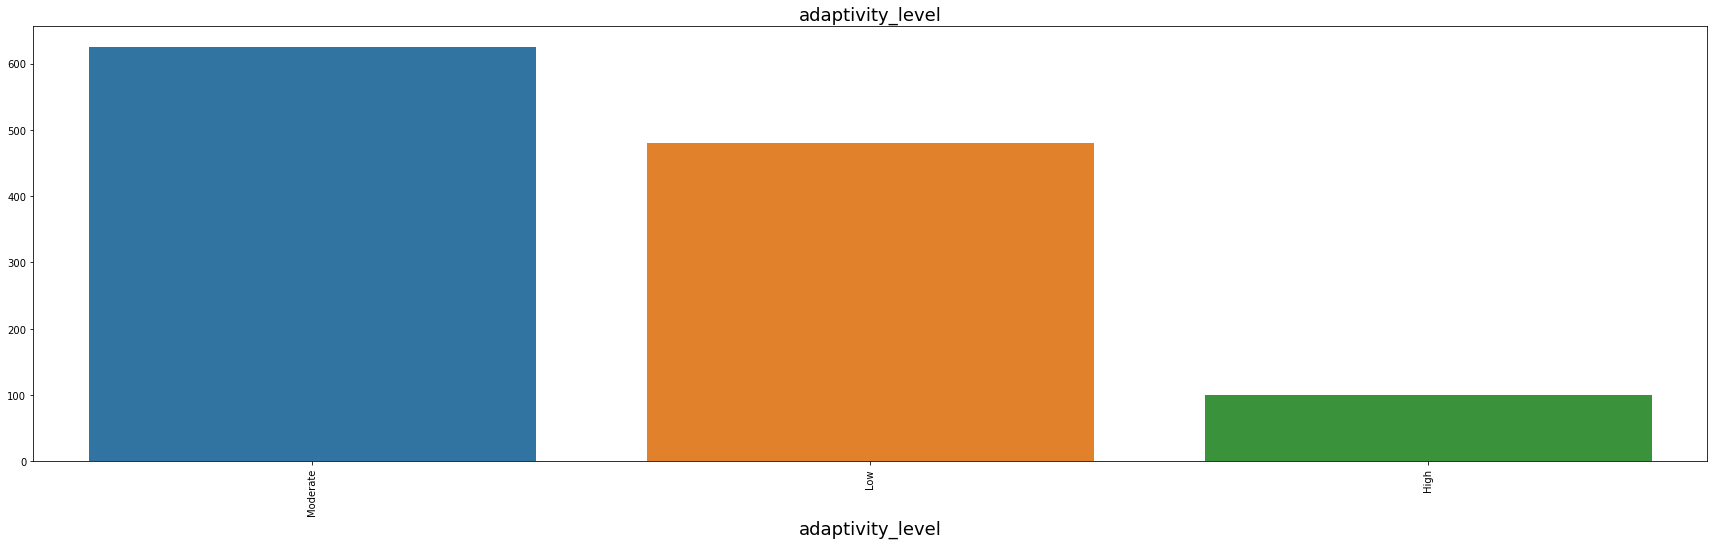

In [59]:
#Graphs
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,8))
sns.countplot(x='adaptivity_level',data=data_raw)
plt.xticks(rotation=90)
plt.xlabel("adaptivity_level", fontsize=18)
plt.ylabel("", fontsize=18)
plt.title("adaptivity_level", fontsize=18)

#Ver outlayers - Detecting the outliers

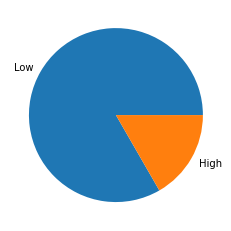

In [12]:
y=data_raw['electricity_supply'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()

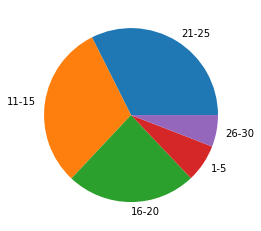

In [60]:
y=data_raw['age'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()

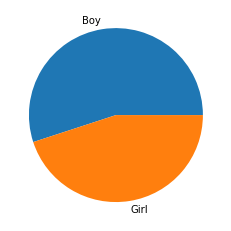

In [61]:
y=data_raw['gender'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()


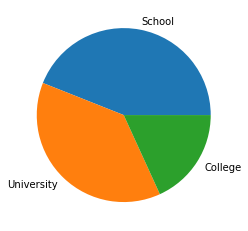

In [62]:
y=data_raw['education_level'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()


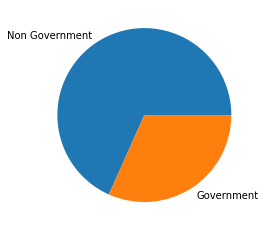

In [63]:
y=data_raw['institution_type'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()

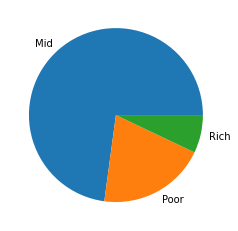

In [64]:
y=data_raw['financial_condition'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()

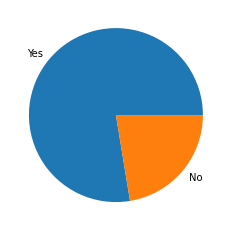

In [65]:
y=data_raw['location'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()

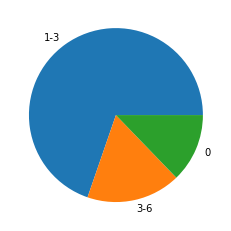

In [66]:
y=data_raw['class_duration'].value_counts() 
valores = y[:5].values.tolist()
labels=y[:5].index.tolist()
plt.pie(valores,labels=labels)
fig=plt.show()



In [67]:
#Atypical values 
target =pd.DataFrame(data_raw['class_duration'].value_counts())
target['percentaje']=round(target/ data_raw.shape[0]*100,2)
target[:]

,class_duration,percentaje
1-3,840,69.71
3-6,211,17.51
0,154,12.78


Replace 0 values in class_duration with mode

In [68]:
data_raw.class_duration[data_raw.class_duration == "0"] = "1-3"


In [69]:
#Now let's check the values
target =pd.DataFrame(data_raw['class_duration'].value_counts())
target['percentaje']=round(target/ data_raw.shape[0]*100,2)
target[:]

,class_duration,percentaje
1-3,994,82.49
3-6,211,17.51


As machine learning algorithms need to take input in numerical inputs, let's get dummies

In [70]:
data_dumies=pd.get_dummies(data_raw,columns=['gender','age', 'education_level', 'institution_type',
       'electricity_supply', 'financial_condition', 'internet_type',
       'network_type', 'class_duration', 'learning_system', 'device','IT_student','location'],drop_first=True)

Defining feature and target 

In [71]:
X=data_dumies.drop(['adaptivity_level'],axis=1)#Features 
y=data_dumies['adaptivity_level'] #target


Loocks very well. We can now start training the machine learning models using the above data 

Multinomial model

Multiclass logistic regression is also called multinomial logistic regression and softmax regression. It is used when we want to predict more than 2 classes. 

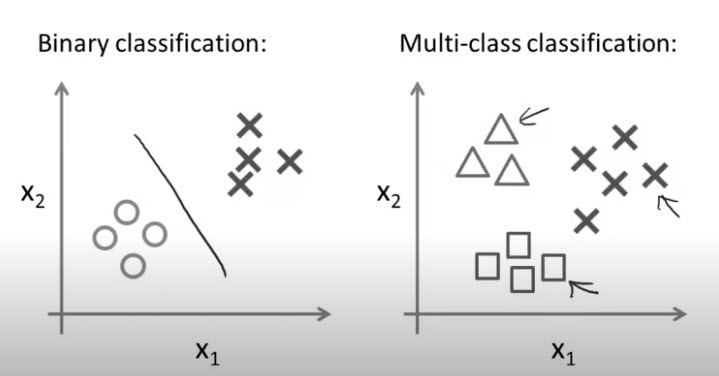

In [79]:
from IPython.display import Image
Image(filename='image.jpg')

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Now that we are done with the cleaning and processing data,
#we can split the data frame into train and test data.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
#Define the model
softmax_model = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=50)
#Training model
softmax_model.fit(scaled_X_train,y_train)
#Forecast data
y_pred = softmax_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

c:\Users\Jannet\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6721854304635762

The accuracy is near to 0.67 major than 0.52. Then reject the null hypothesis in favour of the alternative hypothesis.

Let's do some more test...

The stratify parameter will ensure that the train and test split has the same class distribution ratio as the original dataset. It is crucial in the case of imbalanced datasets. Otherwise, it might happen that the training data only consists of the majority class.

In [86]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(903, 21) (903,) (302, 21) (302,)


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train))
scaled_X_test = pd.DataFrame(scaler.transform(X_test))

 we scale the features using StandardScaler() to perform well

In [75]:
y_train.value_counts()

Moderate    468
Low         360
High         75
Name: adaptivity_level, dtype: int64

In [88]:
#softmax_model = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=50)
#Training model
softmax_model.fit(scaled_X_train,y_train)
#Forecast data
y_pred = softmax_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

c:\Users\Jannet\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6887417218543046

Well...Stratify improve our model, let's keeping exploring other techniques

 Oversampling is one of the most widely used techniques to deal with imbalance classes.
Let's use SMOTE

In [94]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2 )
smote_X_train, smote_y_train = sm.fit_resample(scaled_X_train, y_train)

In [95]:
smote_y_train.value_counts()

Moderate    468
High        468
Low         468
Name: adaptivity_level, dtype: int64

In [91]:
#Define the model
#softmax_model = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=50)
#Training model
softmax_model.fit(smote_X_train,smote_y_train)
#Forecast data
y_pred = softmax_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

c:\Users\Jannet\Anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5927152317880795

Well... Smote doesn't improve so much the model in this case

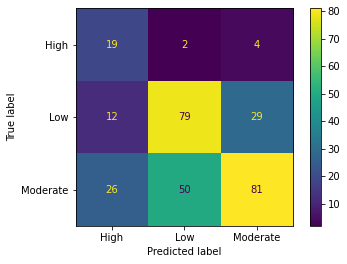

In [92]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(softmax_model,scaled_X_test,y_test)

In [96]:
from sklearn.metrics import classification_report
print(classification_report( y_test,y_pred))

              precision    recall  f1-score   support

        High       0.33      0.76      0.46        25
         Low       0.60      0.66      0.63       120
    Moderate       0.71      0.52      0.60       157

    accuracy                           0.59       302
   macro avg       0.55      0.64      0.56       302
weighted avg       0.64      0.59      0.60       302

